<a href="https://colab.research.google.com/github/mpatrini7/DataLAB42/blob/main/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**mpatrini** - Michael Patrini

# ***Part 1***

In [ ]:
import numpy as np

**1.Create an array of ten zeros**

In [ ]:
np.zeros(10)

**2.Create an array of ten ones**

In [ ]:
np.ones(10)

**3.Create an array of integers from 10 to 50**

In [ ]:
np.arange(10, 51, 1)

**4.Create array of all the even integers from 10 to 50**

In [ ]:
np.arange(10, 51, 2)


**5.Create a 3x3 identity matrix**

In [ ]:
np.identity(3)

**6.Generate a random number between 0 and 1**

In [ ]:
np.random.random()

***7.Create the following matrix:***

In [ ]:
np.linspace(0, 1, 10)

# ***Part 2***

In [ ]:
import matplotlib.pyplot as plt

**1.Create a matrix of random values of distribution of your choice**

In [ ]:
np.random.rand(3, 3)

**2.Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.**

In [ ]:
np.reshape(np.arange(1, 13), (4,3))

**3.Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify.**

In [ ]:
def incr_arr(num):
  return np.reshape(np.linspace(0, 1, num), (1, num))

incr_arr(10)

In [ ]:
incr_arr(10).shape

**4.Generate a 10x12 array and extract row 0-4 of columns 8-12.**

In [ ]:
a = np.random.randn(10, 12)
a.shape

In [ ]:
a

In [ ]:
a[0:5, 7:12]

**5.Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. Plot the matrix with matplotlib’s imshow.**

In [ ]:
m = incr_arr(10)
m

In [ ]:
m2 = incr_arr(10)
m2

In [ ]:
m3 = incr_arr(10)
m3

In [ ]:
matrix = np.concatenate((m, m2))
matrix

In [ ]:
plt.imshow(matrix)

**6.Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.**

In [ ]:
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread("imgs/sterlizia.jpeg", 0)
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
img2 = img.reshape((img.shape[0] * img.shape[1]), 3 )
img2

In [ ]:
matrix = np.concatenate((incr_arr(3), incr_arr(3), incr_arr(3)))
matrix.shape

In [ ]:
img_f = np.matmul(img2, matrix)
img_f

In [ ]:
plt.imshow(img_f.reshape(img.shape).astype(img.dtype))

In [ ]:
matrix = np.random.randn(3,3)
img_f2 = np.dot(img2, matrix)
plt.imshow(img_f2.reshape(img.shape).astype(img.dtype))

In [ ]:
matrix = np.array([[1, 7, 3],[3, 1, 7],[7, 1, 3]])
img_f3 = np.dot(img2, matrix)
plt.imshow(img_f3.reshape(img.shape).astype(img.dtype))

In [ ]:
matrix = np.array([[0.23, 4, 0.11],[0.11, 0.23, 4],[4, 0.23, 0.11]])
img_f4 = np.dot(img2, matrix)
plt.imshow(img_f4.reshape(img.shape).astype(img.dtype))

# ***BONUS***

**Filters. Image editing / processing is done by changing
the values of the matrix (pixel by pixel). In this
section you will code FOUR (non-grayscale) commonly used
image filters. You can use libraries and approaches of
your choice.
Filters to choose from: • Amaro • Mayfair • Rise
• Hudson • Valencia • X-Pro II • Nashville • Lo-Fi • Sierra • Earlybird • Sutro • Toaster**

In [ ]:
!pip install pilgram

In [ ]:
from PIL import Image
import pilgram

In [ ]:
img = Image.open("imgs/sterlizia.jpeg")
plt.imshow(img)

Mayfair

In [ ]:
plt.imshow(pilgram.mayfair(img))

Rise

In [ ]:
plt.imshow(pilgram.rise(img))

Hudson

In [ ]:
plt.imshow(pilgram.hudson(img))

Valencia

In [ ]:
plt.imshow(pilgram.valencia(img))

X-Pro II

In [ ]:
plt.imshow(pilgram.xpro2(img))

Nashville

In [ ]:
plt.imshow(pilgram.nashville(img))

Lo-Fi

In [ ]:
plt.imshow(pilgram.lofi(img))

Earlybird

In [ ]:
plt.imshow(pilgram.earlybird(img))

Toaster

In [ ]:
plt.imshow(pilgram.toaster(img))

Amaro

In [ ]:
import cv2

In [ ]:
def hue_saturation(img_rgb, alpha = 1, beta = 1):
  img_hsv = cv2.cvtColor(np.float32(img_rgb), cv2.COLOR_BGR2HSV)
  hue = img_hsv[:,:,0]
  saturation = img_hsv[:,:,1]
  hue = np.clip(hue * alpha ,0,179)
  saturation = np.clip (saturation * beta, 0,255)
  img_hsv[:,:,0] = hue
  img_hsv[:,:,1] = saturation
  img_transformed = cv2.cvtColor(np.float32(img_hsv), cv2.COLOR_HSV2BGR)
  return img_transformed

def brightness_contrast (ime, alpha = 1.0, beta = 0):
  img_contrast = np.float32(img) * (alpha)
  img_bright = img_contrast + (beta)
  img_bright = np.clip(img_bright, 0,255)
  img_bright = img_bright.astype(np.uint8)
  return img_bright

def replace_color(img,hl=0,sl=0,vl=0,hu=0,su=0,vu=0,nred=0,ngreen=0,nblue=0):
  rows, cols = np.float32(img).shape[:2]
  hsv = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2HSV)
  lower = np.array([hl,sl,hu])
  upper = np.array([hu,su,vu])
  color = cv2.inRange(hsv, lower, upper) 
  np.float32(img)[color>0]=(nblue,ngreen,nred)
  return img

def vignette(img,r,g,b,a):
  color = img.copy()
  color[:,:,0] = b
  color[:,:,1] = g
  color[:,:,2] = r
  res = cv2.addWeighted(img,1-a,color,a,0)
  return res

In [ ]:
def Amaro(img, hue = 1.1, saturation = 1.5, contrast = 0.9, brightness = 10):
  img = hue_saturation(img, hue, saturation)
  img = brightness_contrast(img, contrast, brightness)
  return img

plt.imshow(img)
plt.show()
plt.imshow(Amaro(img))

In [ ]:
def Toaster(img, hue = 1, saturation = 0.9, contrast = 1.4, brightness = -20):
  img = replace_color(img,0,0,0,0,0,128,51,0,0)
  img = replace_color(img,150,255,50,170,255,128,51,0,0)
  img = hue_saturation(img, hue, saturation)
  img = brightness_contrast(img, contrast, brightness)
  img = vignette(img,255,99,66,0.1)
  img = vignette(img,250,250,0,0.3)
  return img

print("Real")
plt.imshow(img)
plt.show()
print("Pilgram Toaster")
plt.imshow(pilgram.toaster(img))
plt.show()
print("Manual Toaster")
plt.imshow(Toaster(img))
plt.show()

# ***NEUROBONUS***

**Implement a "simple" neural network from scratch using NumPy. Explain your project and comment every step of your code (max 30 words per step). Look at the internet for tutorials.**

Tutorial: [Create a simple neural network using numpy](https://numbersmithy.com/create-a-simple-neural-network-using-numpy/)

In [ ]:
from functools import partial
import pandas as pd
from scipy.special import expit, softmax

In [ ]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

def logistic(x):
  return 1 / (1 + np.exp(-x))

def dlogistic(x):
  '''Derivative of the logistic function'''
  return np.exp(-x)/(1 + np.exp(-x))**2

def crossEntropy(yhat, y):
  '''Cross entropy cost function '''
  eps = 1e-10
  yhat = np.clip(yhat, eps, 1-eps)
  return - np.nansum(y*np.log(yhat))

softmax_a = softmax

def readData(path):
	'''Read csv formatted MNIST data
	Args:
		path (str): absolute path to input csv data file.
	Returns:
		x_data (ndarray): mnist input array in shape (n, 784), n is the number
			of records, 784 is the number of (flattened) pixels (28 x 28) in
			each record.
		y_data (ndarray): mnist label array in shape (n, 10), n is the number
			of records. Each label is a 10-element binary array where the only
			1 in the array denotes the label of the record.
	'''
	data_file = pd.read_csv(path, header=None)
	x_data = []
	y_data = []
	for ii in range(len(data_file)):
		lineii = data_file.iloc[ii, :]
		imgii = np.array(lineii.iloc[1:])/255.
		labelii = np.zeros(10)
		labelii[int(lineii.iloc[0])] = 1
		y_data.append(labelii)
		x_data.append(imgii)

	x_data = np.array(x_data)
	y_data = np.array(y_data)

	return x_data, y_data

def plotResult(x_data, y_data, yhat, ax=None):
	'''Plot an image and prediction
	Args:
		x_data (ndarray): input image array in shape (784,).
		y_data (ndarray): mnist label array in shape (10,).
		yhat (int): predicted digit.
	Keyword Args:
		ax (matplotlib axis): if None, create a new.
	'''
	if ax is None:
		fig, ax = plt.subplots()
	nl = int(np.sqrt(x_data.size))
	img = x_data.reshape(nl, nl)
	ax.imshow(img)
	ax.set_title('Input = %d, predict = %d' % (int(np.argmax(y_data)), yhat))
	if ax is None:
		fig.show()

	return

In [ ]:
class neuralNetwork:
	def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate, af=None, daf=None, af_last=None, init_func='xavier', cost_func=None, lam=0.01):
		
		if np.isscalar(n_hidden):
			n_hidden = [n_hidden, ]

		self.cost_func = cost_func
		self.n_inputs = n_inputs
		self.n_hidden = n_hidden
		self.n_outputs = n_outputs
		self.n_nodes = [n_inputs, ]+n_hidden+[n_outputs, ]
		self.n_layers = len(self.n_nodes)
		self.lr = learning_rate
		self.initial_lr = learning_rate
		self.init_func = init_func
		self.lam = lam

		if af is None:
			self.af = expit
			self.daf = dlogistic
		else:
			self.af = af
			self.daf = daf

		if af_last is None:
			self.af_last = softmax_a
		else:
			self.af_last = af_last

		if cost_func is None:
			self.cost_func = crossEntropy
		else:
			self.cost_func = cost_func

		# initialize weights
		self.init()
	
	def init(self):
		self.thetas = {}  # theta_l is mapping from layer l-1 to l
		self.biases = {}  # bias_l is added to layer l when mapping from layer l-1 to l

		for ii in range(1, self.n_layers):
			if self.init_func == 'xavier':
				stdii = np.sqrt(6/(self.n_nodes[ii-1]+self.n_nodes[ii]))
				thetaii = (np.random.rand(self.n_nodes[ii], self.n_nodes[ii-1]) - 0.5) * stdii
			elif self.init_func == 'he':
				stdii = np.sqrt(2/self.n_nodes[ii-1])
				thetaii = np.random.normal(0, stdii, size=(self.n_nodes[ii], self.n_nodes[ii-1]))
		
			self.thetas[ii] = thetaii
			self.biases[ii] = np.zeros([1, self.n_nodes[ii]])

	def sampleCost(self, yhat, y):
		'''cost of a single training sample/batch
		args:
		yhat (ndarray): prediction in shape (n, m). m is the number of
	  final output units, n is the number of records.
		y (ndarray): label in shape (n, m).
		returns:
		cost (float): summed cost.
		'''
		return self.cost_func(yhat, y)

	def regulizationCost(self):
		'''cost from the regularization term
		defined as the summed squared weights in all layers, not including
		biases.
		'''
		j = 0
		for ll in range(1, self.n_layers):
			j = j+np.sum(self.thetas[ll]**2)
		return j

	def feedForward(self, x):
		'''Forward pass
		Args:
		x (ndarray): input data with shape (n, f). f is the number of input units,
		n is the number of records.
		Returns:
		weight_sums (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		weighted sums of each layer:
		z^{(l+1)} = a^{(l)} \cdot \theta^{(l+1)}^{T} + b^{(l+1)}
		where:
		z^{(l+1)}: weighted sum in layer l+1.
		a^{(l)}: activation in layer l.
		\theta^{(l+1)}: weights that map from layer l to l+1.
		b^{(l+1)}: biases added to layer l+1.
		The value for key=0 is the same as input <x>.
		activations (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		activations in each layer. See above.
		'''
		x = np.atleast_2d(x)
		activations = {0: x}
		weight_sums = {0: x}
		a1 = x
		for ii in range(1, self.n_layers):
			bii = self.biases[ii]
			zii = np.dot(a1, self.thetas[ii].T)+bii
			if ii == self.n_layers-1:
				aii = self.af_last(zii)
			else:
				aii = self.af(zii)
			activations[ii] = aii
			weight_sums[ii] = zii
			a1 = aii
		return weight_sums, activations

	def feedBackward(self, weight_sums, activations, y):
		'''Backward propogation

		Args:
		weight_sums (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		weighted sums of each layer.
		activations (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		activations in each layer.
		y (ndarray): label in shape (m, n). m is the number of
		final output units, n is the number of records.
		Returns:
		grads (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		summed gradients for the weight matrix in each layer.
		grads_bias (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		summed gradients for the bias in each layer.
		'''
		grads = {}       # gradients for weight matrices
		grads_bias = {}  # gradients for bias
		y = np.atleast_2d(y)
		delta = activations[self.n_layers-1] - y

		for jj in range(self.n_layers-1, 0, -1):
			grads[jj] = np.einsum('ij,ik->jk', delta, activations[jj-1])
			grads_bias[jj] = np.sum(delta, axis=0, keepdims=True)
			if jj != 1:
				delta = np.dot(delta, self.thetas[jj])*self.daf(weight_sums[jj-1])

		return grads, grads_bias

	def gradientDescent(self, grads, grads_bias, n):
		'''Perform gradient descent parameter update

		Args:
		grads (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		summed gradients for the weight matrix in each layer.
		grads_bias (dict): keys: layer indices starting from 0 for
		the input layer to N-1 for the last layer. Values:
		summed gradients for the bias in each layer.
		n (int): number of records contributing to the gradient computation.

		Update rule:

		\theta_i = \theta_i - \alpha (g_i + \lambda \theta_i)

		where:
		\theta_i: weight i.
		\alpha: learning rate.
		\g_i: gradient of weight i.
		\lambda: regularization parameter.
		'''

		n = float(n)
		for jj in range(1, self.n_layers):
			theta_jj = self.thetas[jj]
			theta_jj = theta_jj - self.lr * grads[jj]/n - theta_jj*self.lr*self.lam/n
			self.thetas[jj] = theta_jj

			bias_jj = self.biases[jj]
			bias_jj = bias_jj - self.lr * grads_bias[jj]/n
			self.biases[jj] = bias_jj

		return
  
	def saveWeights(self, outfilename):
		'''Save model parameters to file
		Args:
			outfilename (str): absolute path to file to save model parameters.
		Parameters are saved using numpy.savez(), loaded using numpy.load().
		'''

		print('\n# <saveWeights>: Save network weights to file', outfilename)

		dump = {'lr': self.lr,
				'n_nodes': self.n_nodes,
				'lam': self.lam}
		for ll in range(1, self.n_layers):
			dump['theta_%d' % ll] = self.thetas[ll]
			dump['bias_%d' % ll] = self.biases[ll]

		np.savez(outfilename, **dump)

		return

	def loadWeights(self, abpathin):
		'''Load model parameters from file
		Args:
			abpathin (str): absolute path to file to load model parameters.
		Parameters are saved using numpy.savez(), loaded using numpy.load().
		'''

		print('\n# <loadWeights>: Load network weights from file', abpathin)

		with np.load(abpathin, allow_pickle=True) as npzfile:
			for ll in range(1, self.n_layers):
				thetall = npzfile['theta_%d' % ll]
				biasll = npzfile['bias_%d' % ll]
				self.thetas[ll] = thetall
				self.biases[ll] = biasll
			self.lam = npzfile['lam']
			self.lr = npzfile['lr']

		return

	def plotNN(self):
		'''Plot structure of network'''

		import networkx as nx

		self.graph = nx.DiGraph()
		show_nodes_half = 3

		layered_nodes = []
		for ll in range(self.n_layers-1):
			# layer l
			nodesll = list(zip([ll, ] * self.n_nodes[ll], range(self.n_nodes[ll])))
			# layer l+1
			nodesll2 = list(zip([ll+1, ]*self.n_nodes[ll+1], range(self.n_nodes[ll+1])))

			# omit if too many
			if len(nodesll) > show_nodes_half*3:
				nodesll = nodesll[:show_nodes_half] + nodesll[-show_nodes_half:]
			if len(nodesll2) > show_nodes_half*3:
				nodesll2 = nodesll2[:show_nodes_half] + nodesll2[-show_nodes_half:]

			# build network
			edges = [(a, b) for a in nodesll for b in nodesll2]
			self.graph.add_edges_from(edges)

			layered_nodes.append(nodesll)
			if ll == self.n_layers-2:
				layered_nodes.append(nodesll2)

		# -----------------Adjust positions-----------------
		pos = {}

		for ll, nodesll in enumerate(layered_nodes):
			posll = np.array(nodesll).astype('float')
			yll = posll[:, 1]
			if self.n_nodes[ll] > show_nodes_half*3:
				bottom = yll[:show_nodes_half]
				top = yll[-show_nodes_half:]
				bottom = bottom/np.ptp(bottom)/3.
				top = (top-np.min(top))/np.ptp(top)/3.+2/3.
				yll = np.r_[bottom, top]
			else:
				yll = yll/np.ptp(yll)

			posll[:, 1] = yll

			pos.update(dict(zip(nodesll, posll)))

		#-------------------Draw figure-------------------
		fig = plt.figure(figsize=(12,12))
		ax = fig.add_subplot(111)
		nx.draw(self.graph, pos=pos, ax=ax, node_size=1200, with_labels=True,
				node_color='c', alpha=0.7)
		plt.show(block=False)

		return

	def _batchTrain(self, x, y):
		'''Training using a single sample or a sample batch
		Args:
			x (ndarray): input with shape (n, f). f is the number of input units,
				n is the number of records.
			y (ndarray): input with shape (n, m). m is the number of output units,
				n is the number of records.
		Returns:
			j (float): summed cost over samples in <x> <y>.
		Slow version, use the sample one by one
		'''
		m = len(x)
		grads = dict([(ll, np.zeros_like(self.thetas[ll])) for ll
					  in range(1, self.n_layers)])
		grads_bias = dict([(ll, np.zeros_like(self.biases[ll])) for ll
						   in range(1, self.n_layers)])
		j = 0   # accumulates cost
		idx = np.random.permutation(m)
		for ii in idx:
			xii = x[ii]
			yii = y[ii]
			weight_sums, activations = self.feedForward(xii)
			j = j+self.sampleCost(activations[self.n_layers-1], yii)
			gradii, grads_biasii = self.feedBackward(
				weight_sums, activations, yii)
			for ll in range(1, self.n_layers):
				grads[ll] = grads[ll]+gradii[ll]
				grads_bias[ll] = grads_bias[ll]+grads_biasii[ll]

		self.gradientDescent(grads, grads_bias, m)

		return j

	def miniBatchTrain(self, x, y, epochs, batch_size):
		'''Training using mini batches
		Args:
			x (ndarray): input with shape (n, f). f is the number of input units,
				n is the number of records.
			y (ndarray): input with shape (n, m). m is the number of output units,
				n is the number of records.
			epochs (int): number of epochs to train.
			batch_size (int): mini-batch size.
		Returns:
			self.costs (ndarray): overall cost at each epoch.
		'''

		self.costs = []
		m = len(x)
		for ee in range(epochs):
			j = 0
			idx = np.random.permutation(m)
			id1 = 0
			while True:
				id2 = id1+batch_size
				id2 = min(id2, m)
				idxii = idx[id1:id2]
				xii = x[idxii]
				yii = y[idxii]
				j = j+self._batchTrain(xii, yii)
				id1 += batch_size
				if id1 > m-1:
					break

			j2 = self.regulizationCost()
			j = j/m + j2*self.lam/m

			print('# <miniBatchTrain>: Epoch = %d, Cost = %f' % (ee, j))
			# annealing
			if len(self.costs) > 1 and j > self.costs[-1]:
				self.lr *= 0.9
				print('# <miniBatchTrain>: Annealing learning rate, current lr =', self.lr)

			self.costs.append(j)

		self.costs = np.array(self.costs)

		return self.costs

	def predict(self, x):
		'''Model prediction
		Args:
			x (ndarray): input with shape (n, f). f is the number of input units,
				n is the number of records.
		Returns:
			yhat (ndarray): prediction with shape (n, m). m is the number of output units,
				n is the number of records.
		'''
		yhat = self.feedForward(x)[1][self.n_layers-1]
		return yhat

x_data.shape: (60000, 784)
y_data.shape: (60000, 10)


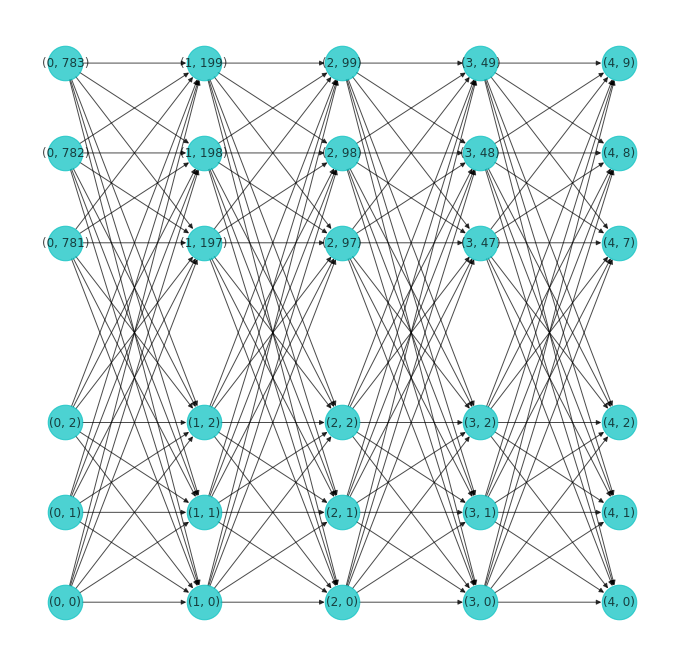


# <saveWeights>: Save network weights to file weights.npz

# <loadWeights>: Load network weights from file weights.npz
# <miniBatchTrain>: Epoch = 0, Cost = 2.305483
# <miniBatchTrain>: Epoch = 1, Cost = 2.302407
# <miniBatchTrain>: Epoch = 2, Cost = 2.295574
# <miniBatchTrain>: Epoch = 3, Cost = 2.014934
# <miniBatchTrain>: Epoch = 4, Cost = 1.265834
# <miniBatchTrain>: Epoch = 5, Cost = 0.821208
# <miniBatchTrain>: Epoch = 6, Cost = 0.619807
# <miniBatchTrain>: Epoch = 7, Cost = 0.519251
# <miniBatchTrain>: Epoch = 8, Cost = 0.450173
# <miniBatchTrain>: Epoch = 9, Cost = 0.399052
# <miniBatchTrain>: Epoch = 10, Cost = 0.360515
# <miniBatchTrain>: Epoch = 11, Cost = 0.329591
# <miniBatchTrain>: Epoch = 12, Cost = 0.301867
# <miniBatchTrain>: Epoch = 13, Cost = 0.277742
# <miniBatchTrain>: Epoch = 14, Cost = 0.255440
# <miniBatchTrain>: Epoch = 15, Cost = 0.233931
# <miniBatchTrain>: Epoch = 16, Cost = 0.216217
# <miniBatchTrain>: Epoch = 17, Cost = 0.200727
# <miniBatchTrain>: Epoch 

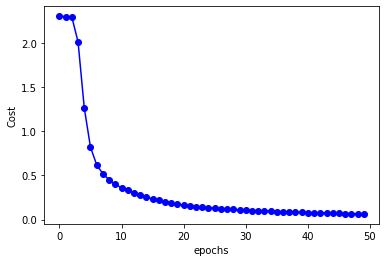

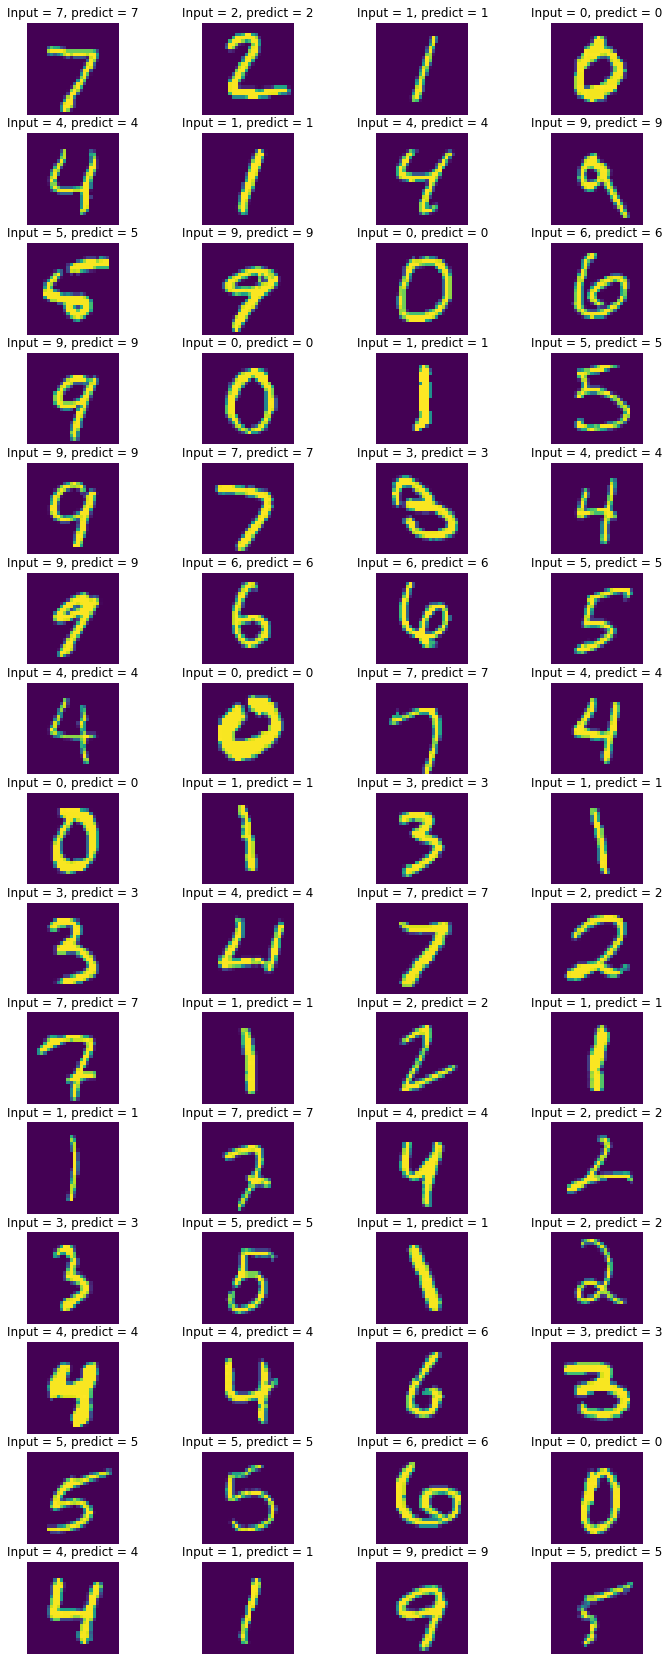

In [125]:

# ---------------------Globals---------------------
TRAIN_DATA_FILE = 'mnist/mnist_train.csv'
TEST_DATA_FILE = 'mnist/mnist_test.csv'

N_INPUTS = 784                 # input number of units
N_HIDDEN = [200, 100, 50]      # hidden layer sizes
N_OUTPUTS = 10                 # output number of units
LEARNING_RATE = 0.1            # initial learning rate
LAMBDA = 0.01                  # regularization parameter
EPOCHS = 50                   # training epochs


if __name__ == '__main__':
    # np.savez("weights.npz")
    # -----------------Open MNIST data-----------------
    x_data, y_data = readData(TRAIN_DATA_FILE)
    print('x_data.shape:', x_data.shape)
    print('y_data.shape:', y_data.shape)

    # ------------------Create network------------------
    nn = neuralNetwork(N_INPUTS, N_HIDDEN, N_OUTPUTS, LEARNING_RATE, af_last=softmax_a, lam=LAMBDA)

    # -----------------Mini-batch train-----------------
    nn.plotNN()
    nn.saveWeights('weights.npz')
    nn.loadWeights('weights.npz')

    import time
    t1=time.time()
    costs = nn.miniBatchTrain(x_data, y_data, EPOCHS, 64)
    t2=time.time()
    print('time=',t2-t1)

    # -----------Plot a graph of the network-----------
    fig, ax = plt.subplots()
    ax.plot(costs, 'b-o')
    ax.set_xlabel('epochs')
    ax.set_ylabel('Cost')
    fig.show()

    nn.saveWeights('weights.npz')

    # ---------------Validate on train set---------------
    yhat_train = np.argmax(nn.predict(x_data), axis=1)
    y_true_train = np.argmax(y_data, axis=1)
    n_correct_train = np.sum(yhat_train == y_true_train)

    print('Training samples:')
    n_test_train = 50
    for ii in np.random.randint(0, len(y_data)-1, n_test_train):
        yhatii = yhat_train[ii]
        ytrueii = y_true_train[ii]
        print('yhat = %d, yii = %d' % (yhatii, ytrueii))

    # ------------------Open test data------------------
    x_data_test, y_data_test = readData(TEST_DATA_FILE)

    # ---------------test on test set---------------
    yhat_test = np.argmax(nn.predict(x_data_test), axis=1)
    y_true_test = np.argmax(y_data_test, axis=1)
    n_correct_test = np.sum(yhat_test == y_true_test)

    print('Test samples:')
    n_test = 50
    for ii in np.random.randint(0, len(y_data_test)-1, n_test):
        yhatii = yhat_test[ii]
        ytrueii = y_true_test[ii]
        print('yhat = %d, yii = %d' % (yhatii, ytrueii))

    print('Accuracy in training set:', n_correct_train/float(len(x_data))*100.)
    print('Accuracy in test set:', n_correct_test/float(len(x_data_test))*100.)

    #----------------Plot some results----------------
    nrows = 15
    ncols = 4
    n_plots =  nrows*ncols
    fig = plt.figure(figsize=(12, 30))
    for i in range(n_plots):
        axi = fig.add_subplot(nrows, ncols, i+1)
        axi.axis('off')
        xi = x_data_test[i]
        yi = y_data_test[i]
        yhati = yhat_test[i]
        plotResult(xi, yi, yhati, ax=axi)

    fig.show()